**Q1**. Wolfram's Cellular Automata (100 points)

Write code to generate a plot similar to the following ![figure](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif) using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`. The plots should be generated from a list of the rules `[30,54,60,62,90,94,102,110,122,126,150,158, 182,188,190,220,222,250]`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [3]:
def convertToBinary(n):
    """convertToBinary will convert a number less than 256 and greater than or equal to 0 to binary 
    and add leading 0's if necessary. There should be 8 0's or 1's"""
    if (n >= 0) & (n < 256):
        return "{0:b}".format(n).zfill(8)
    else:
        return n

In [22]:
def rule(n):
    """rule takes a number, converts it to binary, then assigns a rule for each possible scenario 
    depending on the inputted number"""
    mappings = {}
    possibleScenarios = ['111', '110', '101', '100', '011', '010', '001', '000']
    ruleSelected = convertToBinary(n)
    for index, r in enumerate(ruleSelected):
        mappings[possibleScenarios[index]] = r
    return mappings

In [23]:
def nextGen(parents, n):
    """nextGen takes a list of parent values and a rule number,
    then returns the list of child values depending on the rule"""
    children = []
    behaviors = rule(n)
    
    for index, p in enumerate(parents):
        if(index == 0):
            concatMe = str(0) + str(p) + str(parents[index+1])
        elif(index == (len(parents)-1)):
            concatMe = str(parents[index-1]) + str(p) + str(0)
        else:
            concatMe = str(parents[index-1]) + str(p) + str(parents[index+1])
        # Here, concatMe should be a string equivalent of the numbers concatenated together
        
        childValue = int(behaviors[concatMe])
        children.append(childValue)
    
    return children

In [11]:
row1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # Our first generation is always the same
listOfRules = [30,54,60,62,90,94,102,110,122,126,150,158, 182,188,190,220,222,250]

In [24]:
def createPlot(initRow, ruleChoice):
    """createPlot takes a list of numbers (the initial parent row) and a rule number, then returns
    a list containing the values for the next 15 generations"""
    x = []
    x.append(initRow)
    for j in range(15):
        x.append(nextGen(x[j], ruleChoice))
    x = np.array(x)
    return x

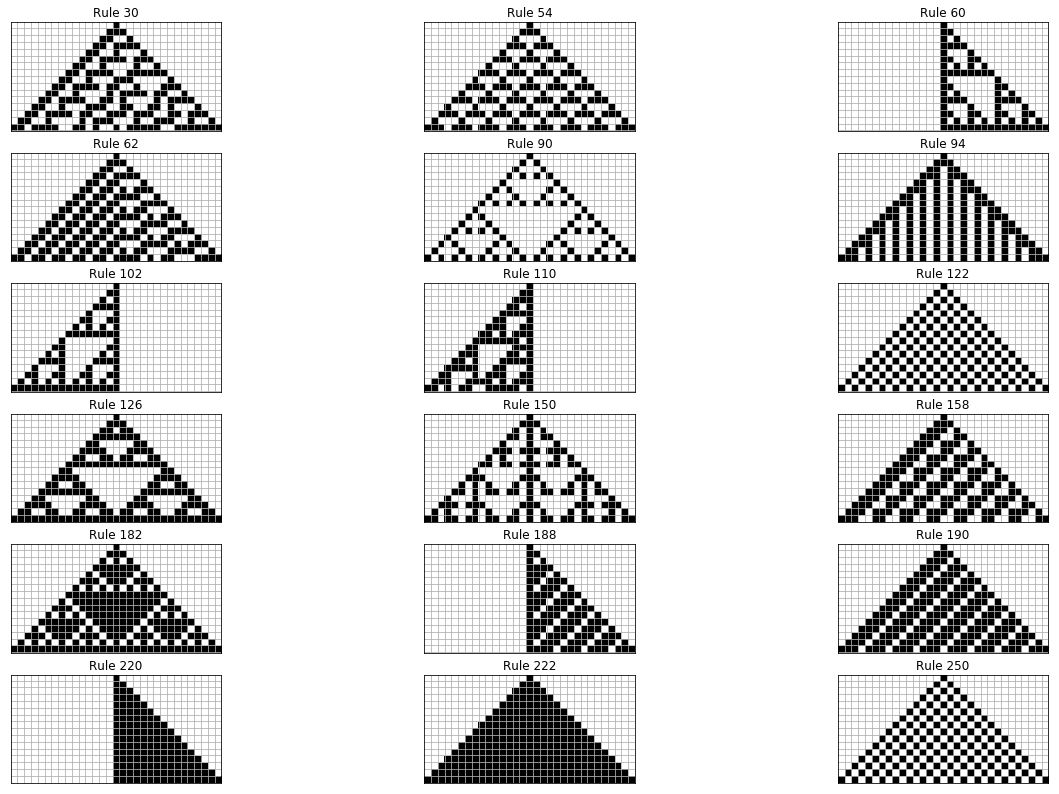

In [53]:
plots = []
for choice in listOfRules:
    plots.append(createPlot(row1, choice))

fig, axes = plt.subplots(6,3,figsize=(21,14))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(plots[i], cmap='binary')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title('Rule ' + str(listOfRules[i]))
    ax.set_xticks(np.arange(0.5, 31.5))
    ax.set_yticks(np.arange(0.4, 15.5))
    ax.grid(linestyle="solid")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')